In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pathlib import Path
import pandas as pd

### Data loading

In [2]:
path = Path('~/datasets/')
data = pd.read_csv(path/'heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


<AxesSubplot:title={'center':'Class distribution'}, xlabel='HeartDisease'>

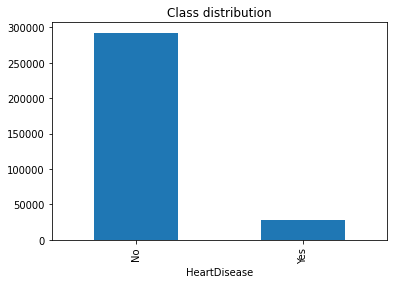

In [3]:
data.pivot_table(index='HeartDisease', aggfunc='size').plot(kind='bar', title = 'Class distribution')

In [4]:
filtered_data = data[['HeartDisease', 'Smoking','AlcoholDrinking','Stroke',
                 'PhysicalHealth','MentalHealth','Sex','AgeCategory',
                 'Race', 'PhysicalActivity','SleepTime', 'Diabetic']]
filtered_data.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,PhysicalActivity,SleepTime,Diabetic
0,No,Yes,No,No,3.0,30.0,Female,55-59,White,Yes,5.0,Yes
1,No,No,No,Yes,0.0,0.0,Female,80 or older,White,Yes,7.0,No
2,No,Yes,No,No,20.0,30.0,Male,65-69,White,Yes,8.0,Yes
3,No,No,No,No,0.0,0.0,Female,75-79,White,No,6.0,No
4,No,No,No,No,28.0,0.0,Female,40-44,White,Yes,8.0,No


### Data encoding

In [5]:
encoded_data = filtered_data.copy()

In [6]:
encoded_data['HeartDisease'] = filtered_data['HeartDisease'].astype('category').cat.codes
encoded_data['Smoking'] = filtered_data['Smoking'].astype('category').cat.codes
encoded_data['AlcoholDrinking'] = filtered_data['AlcoholDrinking'].astype('category').cat.codes
encoded_data['Stroke'] = filtered_data['Stroke'].astype('category').cat.codes
encoded_data['PhysicalHealth'] = filtered_data['PhysicalHealth'].astype('category').cat.codes
encoded_data['MentalHealth'] = filtered_data['MentalHealth'].astype('category').cat.codes
encoded_data['Sex'] = filtered_data['Sex'].astype('category').cat.codes
encoded_data['AgeCategory'] = filtered_data['AgeCategory'].astype('category').cat.codes
encoded_data['Race'] = filtered_data['Race'].astype('category').cat.codes
encoded_data['PhysicalActivity'] = filtered_data['PhysicalActivity'].astype('category').cat.codes
encoded_data['SleepTime'] = filtered_data['SleepTime'].astype('category').cat.codes
encoded_data['Diabetic'] = filtered_data['Diabetic'].astype('category').cat.codes

encoded_data.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,PhysicalActivity,SleepTime,Diabetic
0,0,1,0,0,3,30,0,7,5,1,4,2
1,0,0,0,1,0,0,0,12,5,1,6,0
2,0,1,0,0,20,30,1,9,5,1,7,2
3,0,0,0,0,0,0,0,11,5,0,5,0
4,0,0,0,0,28,0,0,4,5,1,7,0


### Model training

In [7]:
#stratified sampling forces the same class balance on the train and test dataset as the original data
train, test = train_test_split(encoded_data, test_size=0.3, stratify=data['HeartDisease'])

In [8]:
model = LogisticRegression(max_iter=1000)

In [9]:
model.fit(train[['Smoking','AlcoholDrinking','Stroke',
                 'PhysicalHealth','MentalHealth','Sex','AgeCategory',
                 'Race', 'PhysicalActivity','SleepTime', 'Diabetic']],
         train['HeartDisease'])

LogisticRegression(max_iter=1000)

In [10]:
preds = model.predict(test[['Smoking','AlcoholDrinking','Stroke',
                 'PhysicalHealth','MentalHealth','Sex','AgeCategory',
                 'Race', 'PhysicalActivity','SleepTime', 'Diabetic']])

###  Checking out metrics

In [11]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report

In [12]:
len(test)

95939

<AxesSubplot:title={'center':'Class distribution'}, xlabel='HeartDisease'>

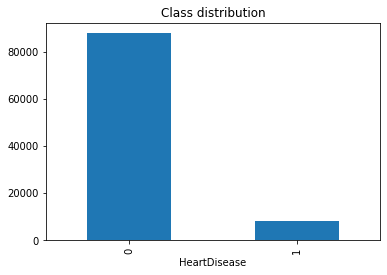

In [13]:
test.pivot_table(index='HeartDisease', aggfunc='size').plot(kind='bar', title = 'Class distribution')

In [14]:
true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(test['HeartDisease'], preds).ravel()
print(f'True negatives: {true_negatives}')
print(f'False positives: {false_positives}') 
print(f'False negatives: {false_negatives}')
print(f'True Positives: {true_positives}')

True negatives: 87097
False positives: 630
False negatives: 7580
True Positives: 632


In [15]:
precision_score(test['HeartDisease'], preds)

0.5007923930269413

In [16]:
recall_score(test['HeartDisease'], preds)

0.07696054554310765

In [17]:
f1_score(test['HeartDisease'], preds)

0.1334177749630568

In [18]:
accuracy_score(test['HeartDisease'], preds)

0.9144247907524573

In [19]:
print(classification_report(test['HeartDisease'], preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87727
           1       0.50      0.08      0.13      8212

    accuracy                           0.91     95939
   macro avg       0.71      0.53      0.54     95939
weighted avg       0.88      0.91      0.88     95939



### Trying to improve f1 score

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
X_resampled, y_resampled = SMOTE().fit_resample(
    train[['Smoking','AlcoholDrinking','Stroke',
           'PhysicalHealth','MentalHealth','Sex','AgeCategory',
           'Race', 'PhysicalActivity','SleepTime', 'Diabetic']], train['HeartDisease'])

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='HeartDisease'>

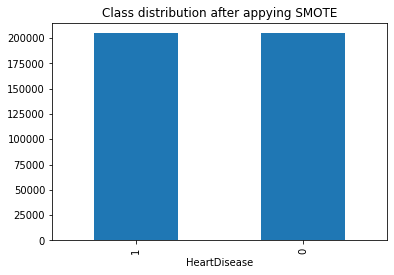

In [22]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='HeartDisease')

In [23]:
new_model = LogisticRegression(max_iter=1000)

In [24]:
new_model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000)

In [25]:
preds = new_model.predict(test[['Smoking','AlcoholDrinking','Stroke',
                 'PhysicalHealth','MentalHealth','Sex','AgeCategory',
                 'Race', 'PhysicalActivity','SleepTime', 'Diabetic']])

In [26]:
true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(test['HeartDisease'], preds).ravel()
print(f'True negatives: {true_negatives}')
print(f'False positives: {false_positives}') 
print(f'False negatives: {false_negatives}')
print(f'True Positives: {true_positives}')

True negatives: 61609
False positives: 26118
False negatives: 1889
True Positives: 6323


In [27]:
# So SMOTE applying helped to increase True Positives, but also there are more false positives now. 
# This works for some specific tasks, but still data preparation needs to be done.

In [28]:
print(classification_report(test['HeartDisease'], preds))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     87727
           1       0.19      0.77      0.31      8212

    accuracy                           0.71     95939
   macro avg       0.58      0.74      0.56     95939
weighted avg       0.90      0.71      0.77     95939



In [ ]:
# try decision tree here 